In [14]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Ensure plots are rendered in the notebook
%matplotlib inline


In [15]:
# Load the dataset from the local file or a provided link
df = pd.read_csv('./bank-additional.csv', delimiter=';')

# Rename the target column for clarity
df.rename(columns={'y': 'deposit'}, inplace=True)

# Display the first few rows of the dataset
df.head()

# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Summary information about the dataset
df.info()


Dataset contains 4119 rows and 21 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   flo

In [16]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Check for missing values
print("Missing values in each column:\n", df.isna().sum())


Number of duplicate rows: 0
Missing values in each column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


In [17]:
# Extract categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

# Label encode categorical variables
lb = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(lb.fit_transform)

# Confirm the changes
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


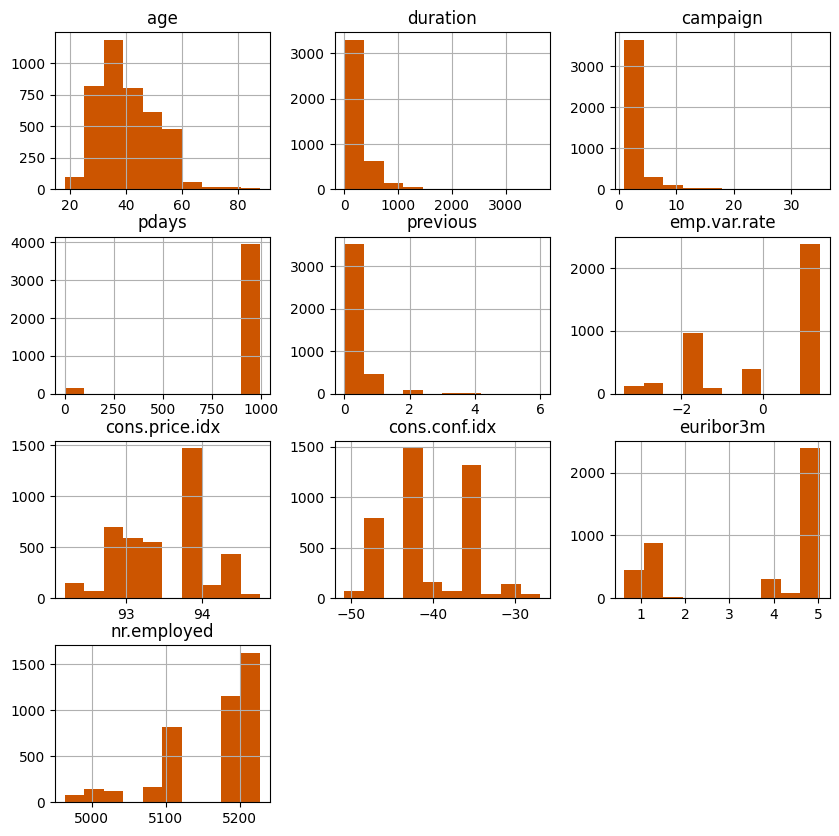

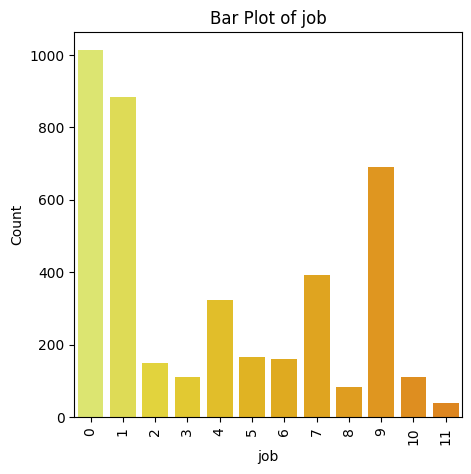

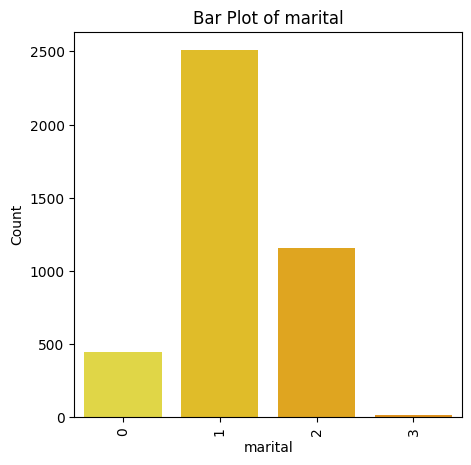

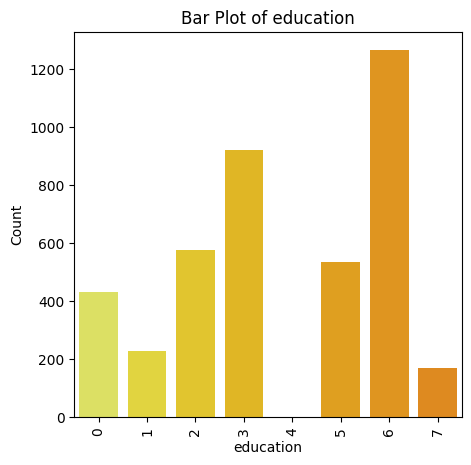

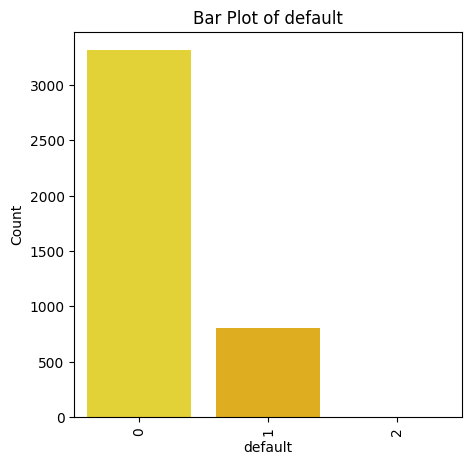

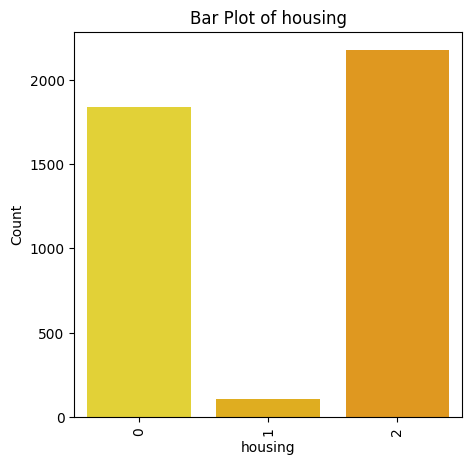

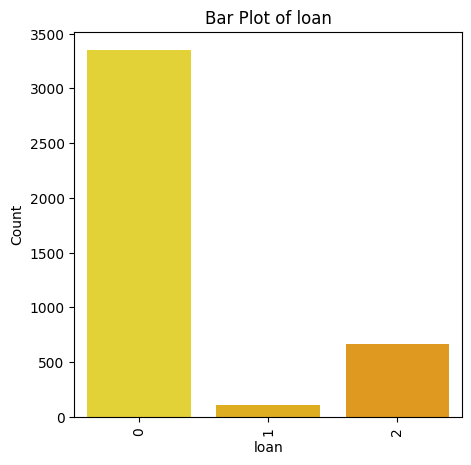

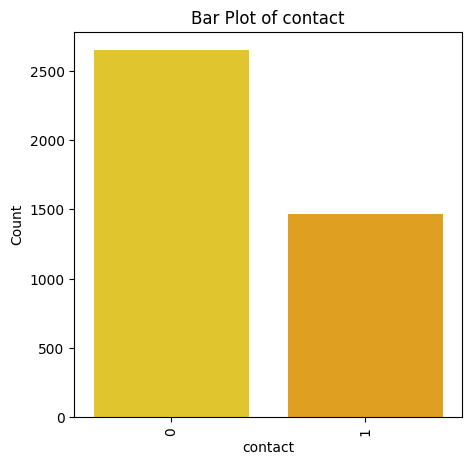

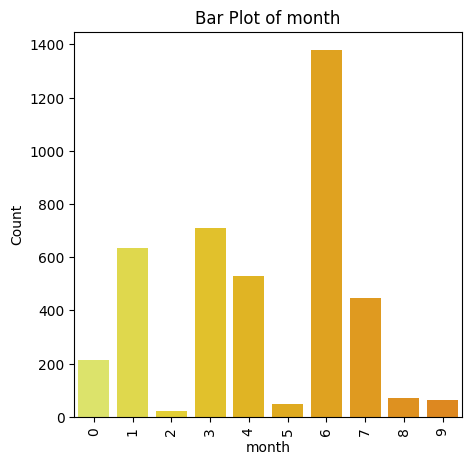

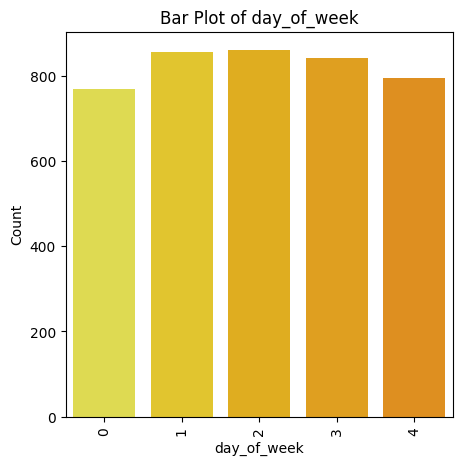

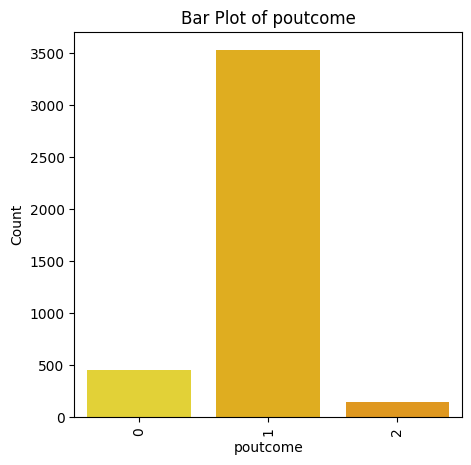

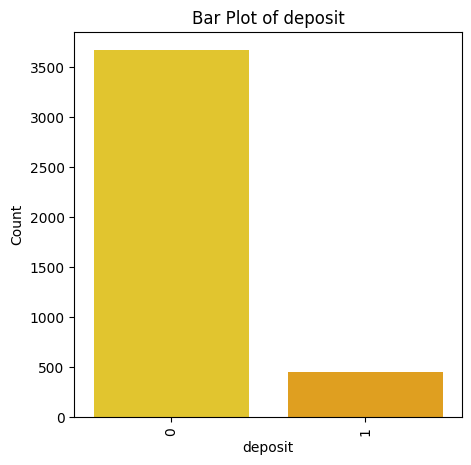

In [18]:
# Histograms for numerical columns
df[num_cols].hist(figsize=(10,10), color='#cc5500')
plt.show()

# Bar plots for categorical columns
for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


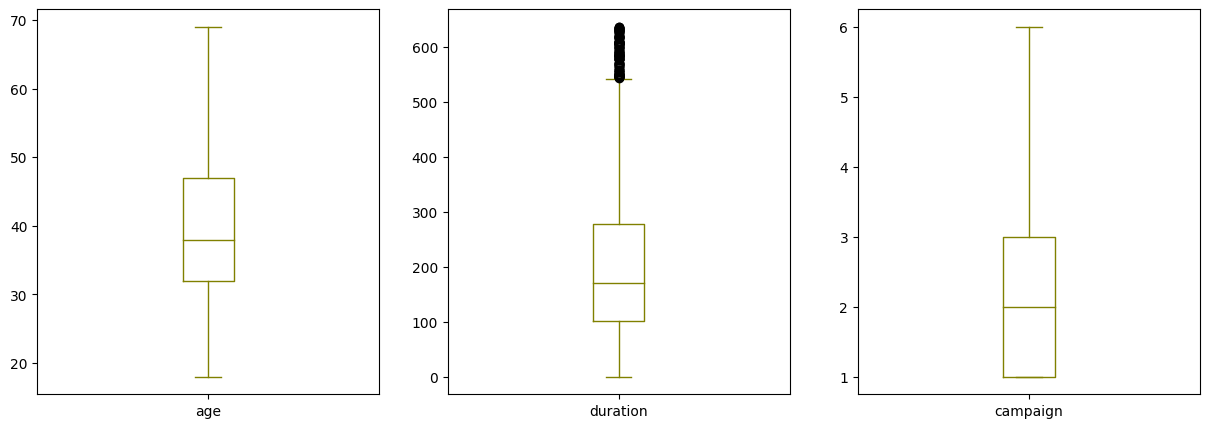

In [19]:
# Identifying and removing outliers using IQR
def remove_outliers(df, column_names):
    for col in column_names:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the selected columns
df = remove_outliers(df, ['age', 'duration', 'campaign'])

# Verify removal by plotting boxplots
df[['age', 'duration', 'campaign']].plot(kind='box', subplots=True, layout=(1,3), figsize=(15,5), color='#808000')
plt.show()


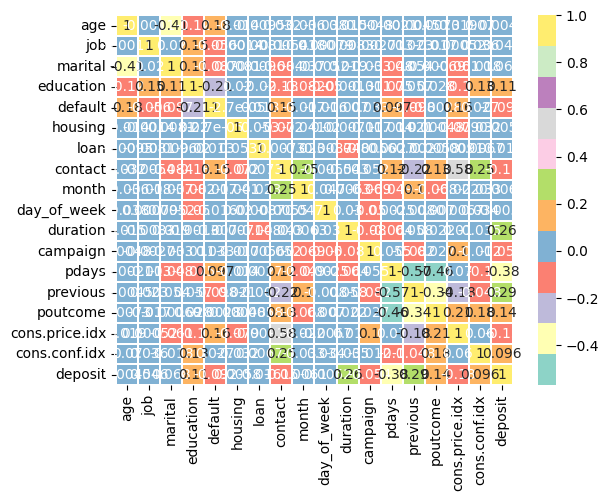

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')
Updated dataset shape: (3567, 18)


In [23]:
# Compute correlation matrix
corr = df.corr()

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='Set3', linewidths=0.2)
plt.show()

# Verify column names before dropping
print(df.columns)  # Print available columns for inspection

# Remove highly correlated features (adjust names if needed based on printed output)
high_corr_cols = ['emp.var.rate', 'euribor3m', 'nr.employed']
df.drop(columns=high_corr_cols, inplace=True, errors='ignore')  # Use errors='ignore' to skip non-existent columns

# Confirm the shape of the updated dataset
print(f"Updated dataset shape: {df.shape}")

In [24]:
# Define independent (X) and dependent (y) variables
X = df.drop('deposit', axis=1)
y = df['deposit']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Verify the split
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (2675, 17), Testing set shape: (892, 17)


In [25]:
# Initialize the Decision Tree Classifier with Gini index
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt_gini.fit(X_train, y_train)

# Evaluate the model performance
train_score_gini = dt_gini.score(X_train, y_train)
test_score_gini = dt_gini.score(X_test, y_test)

print(f"Training Score: {train_score_gini}, Testing Score: {test_score_gini}")


Training Score: 0.9446728971962617, Testing Score: 0.9372197309417041


In [26]:
# Generate predictions
y_pred_gini = dt_gini.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gini))


Confusion Matrix:
 [[816  16]
 [ 40  20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       832
           1       0.56      0.33      0.42        60

    accuracy                           0.94       892
   macro avg       0.75      0.66      0.69       892
weighted avg       0.93      0.94      0.93       892



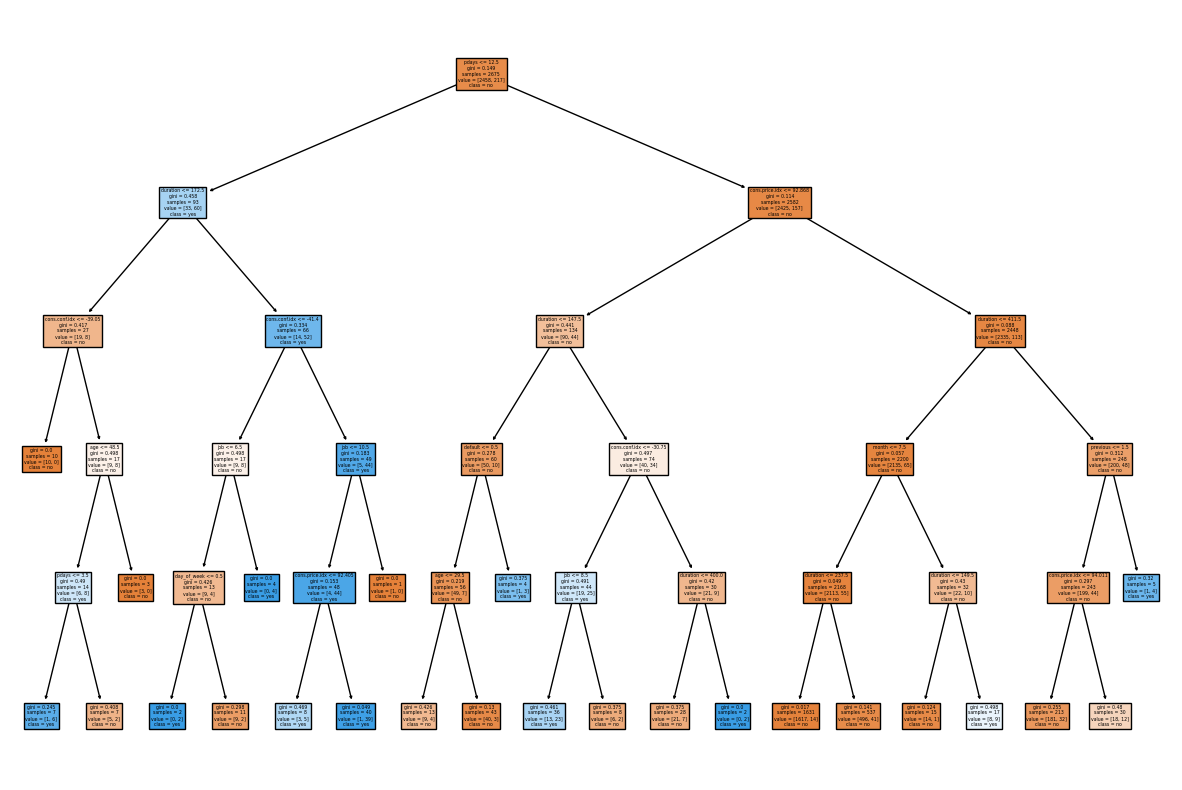

In [27]:
# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(dt_gini, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()


Entropy-based Decision Tree
Confusion Matrix:
 [[825   7]
 [ 44  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       832
           1       0.70      0.27      0.39        60

    accuracy                           0.94       892
   macro avg       0.82      0.63      0.68       892
weighted avg       0.93      0.94      0.93       892



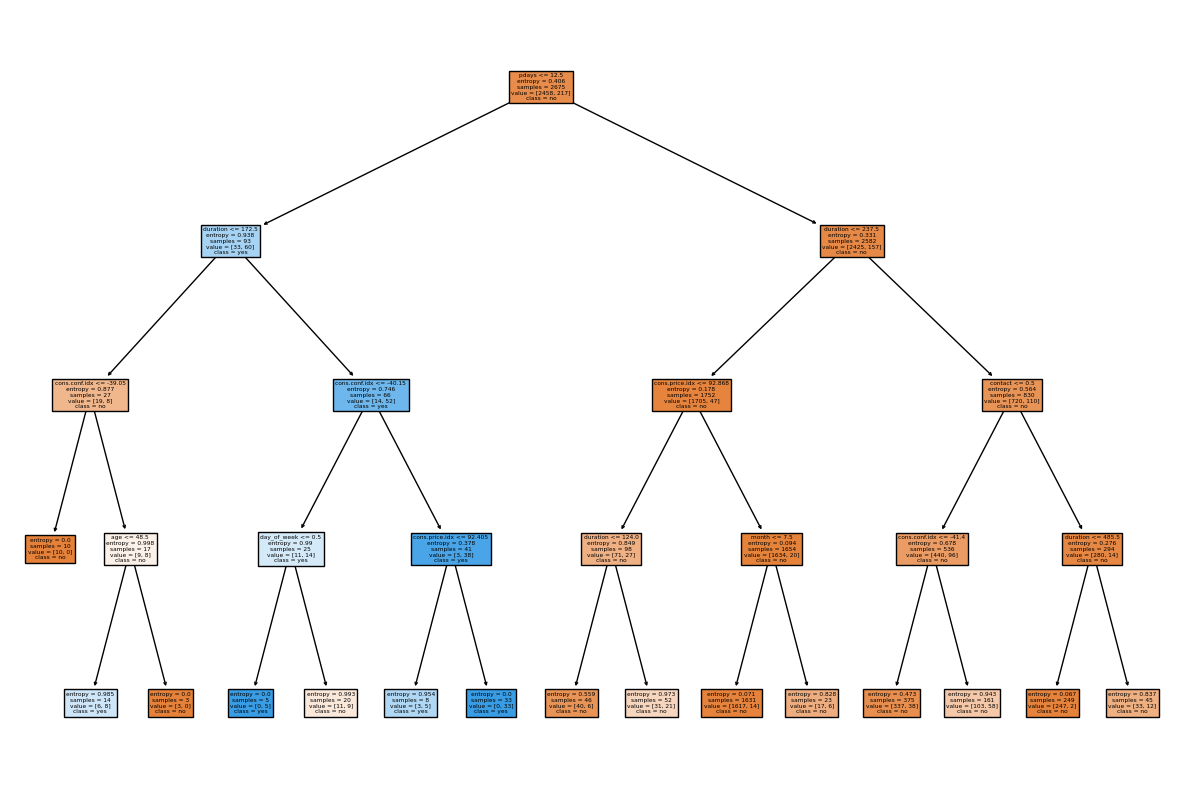

In [28]:
# Initialize the Decision Tree Classifier with Entropy index
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)
dt_entropy.fit(X_train, y_train)

# Evaluate the model
y_pred_entropy = dt_entropy.predict(X_test)
print("Entropy-based Decision Tree")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_entropy))

# Visualize the entropy-based decision tree
plt.figure(figsize=(15,10))
plot_tree(dt_entropy, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()
